# Project 01 - Color Compression

## Thông tin sinh viên

- Họ và tên: Hồ Phước Hoàn
- MSSV: 22127119
- Lớp: 22CLC05

## Import các thư viện liên quan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Helper functions

In [2]:
def read_img(img_path: str) -> Image.Image:
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image (2D)
    '''
    # YOUR CODE HERE
    try:
        return Image.open(img_path)
    except FileNotFoundError as e:
        print(f"File not found: {e.filename}")
        return None


def show_img(img_2d: np.ndarray) -> None:
    '''
    Show image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    '''
    # YOUR CODE HERE
    plt.title("Compressed image")
    plt.imshow(img_2d) # choose img_2d to show
    plt.axis('off') # clear axis of chart to completely display image
    plt.show() # show image


def save_img(img_2d: np.ndarray, img_path: str) -> None:
    '''
    Save image to img_path

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    img_path : str
        Path of image
    '''
    # YOUR CODE HERE
    image = Image.fromarray(img_2d)
    image.save(img_path)


def convert_img_to_1d(img_2d: np.ndarray) -> np.ndarray:
    '''
    Convert 2D image to 1D image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)

    Returns
    -------
        Image (1D)
    '''

    # YOUR CODE HERE
    # 3: number of columns represent for color channels (this case: rgb), -1: special number in numpy to automatically get number that compatible to size of matrix, in this case is the row  
    # before: shape = (row=x, col=y, channel=3), after: shape = (x*y, 3)
    return img_2d.reshape(-1, 3)


def kmeans(img_1d: np.ndarray, k_clusters: int, max_iter: int, init_centroids='random'):
    '''
    K-Means algorithm

    Parameters
    ----------
    img_1d : np.ndarray with shape=(height * width, num_channels)
        Original (1D) image
    k_clusters : int
        Number of clusters
    max_iter : int
        Max iterator
    init_centroids : str, default='random'
        The method used to initialize the centroids for K-means clustering
        'random' --> Centroids are initialized with random values between 0 and 255 for each channel
        'in_pixels' --> A random pixel from the original image is selected as a centroid for each cluster

    Returns
    -------
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Stores the color centroids for each cluster
    labels : np.ndarray with shape=(height * width, )
        Stores the cluster label for each pixel in the image
    '''
    
    # YOUR CODE HERE
    centroids = initalize_centroids(img_1d, k_clusters, init_centroids)
    for _ in range(max_iter):
        labels = assign_cluster_labels(img_1d, centroids)
        new_centroids = update_centroids(img_1d, labels, k_clusters)
        # check after down round, if two array is equal
        if np.array_equal(new_centroids.astype(np.uint8), centroids.astype(np.uint8)):
            break
        centroids = new_centroids

    return centroids, labels


def generate_2d_img(img_2d_shape: tuple, centroids: np.ndarray, labels: np.ndarray) -> np.ndarray:
    '''
    Generate a 2D image based on K-means cluster centroids

    Parameters
    ----------
    img_2d_shape : tuple (height, width, 3)
        Shape of image
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Store color centroids
    labels : np.ndarray with shape=(height * width, )
        Store label for pixels (cluster's index on which the pixel belongs)

    Returns
    -------
        New image (2D)
    '''

    # YOUR CODE HERE
    # assign new cluster label color for each pixels and casting them to uint8 [0-255]
    compressed_image = centroids[labels].astype(np.uint8)
    return np.reshape(compressed_image, img_2d_shape)


# Your additional functions here
def initalize_centroids(img_1d: np.ndarray, k_clusters: int, init_centroids: str) -> np.ndarray:
    if init_centroids == 'random':
        return np.random.choice(256, (k_clusters, 3)).astype(np.uint8)
    elif init_centroids == 'in_pixels':
        img_1d_unique = np.unique(img_1d, axis=0)
        return img_1d_unique[np.random.choice(img_1d_unique.shape[0], k_clusters, replace=False)]


def assign_cluster_labels(img_1d: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    # assign the closest cluster label to each pixel in img_1d by calculate all distances of each pixel with each centroids by euclidean distance
    # and return the index of closest centroids for each pixels
    distances = ((img_1d[:, np.newaxis, :] - centroids[np.newaxis, :, :])**2).sum(axis=2)
    return np.argmin(distances, axis=1)
    

def update_centroids(img_1d: np.ndarray, labels: np.ndarray, k_clusters: int) -> np.ndarray:
    # update centroids by calculating mean of color channel of all pixels that have same label 
    return np.array([img_1d[labels == i].mean(axis=0) if np.any(labels == i) else np.random.choice(256, 3, replace=False) for i in range(k_clusters)])


def compressed_image_color(original_image: np.ndarray) -> np.ndarray:
    original_shape = original_image.shape
    img_1d = convert_img_to_1d(original_image)
    # compress image
    centroids, labels = kmeans(img_1d, k_clusters=7, max_iter=100, init_centroids='random')
    return generate_2d_img(original_shape, centroids, labels)

## Your tests

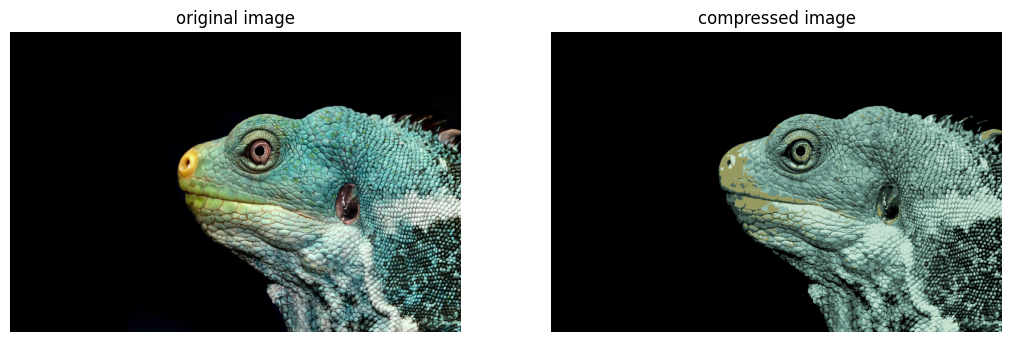

In [3]:
# YOUR CODE HERE
from sklearn.cluster import KMeans

img_path = "/mnt/c/Users/phuoc/Work Space/My Uni/Applied Mathematics and Statistics/Lab/Project 1 - lab 02/lizard-8787888_1280.png" # image path to input
# img_path = "/mnt/c/Users/phuoc/Work Space/My Uni/Applied Mathematics and Statistics/Lab/Project 1 - lab 02/pexels-jack-atkinson-1289771108-25935100.jpg" # image path to input

image = read_img(img_path)

if image is None:
    print("Please provide a valid image path.")
else:
    original_image = np.array(image, dtype=np.uint8)
    original_shape = original_image.shape
    img_1d = convert_img_to_1d(original_image)
    kmeans_test = KMeans(n_clusters=7).fit(img_1d)
    compressed_image = generate_2d_img(original_shape, kmeans_test.cluster_centers_, kmeans_test.labels_)
    
    plt.figure(figsize=(6.4*2, 4.8*2))
    
    plt.subplot(1, 2, 1)
    plt.title("original image")
    plt.axis("off")
    plt.imshow(original_image)

    plt.subplot(1, 2, 2)
    plt.title("compressed image")
    plt.axis("off")
    plt.imshow(compressed_image)

    plt.show()

## Main FUNCTION

In [4]:
# YOUR CODE HERE
def main() -> None:
    img_path = input("Input file path or file name of image, must have extension of image file") # image path to input
    out_img_path = input("type file path or file name of image to save, must have extension of image file") # image path to save

    image = read_img(img_path)
    if image is None:
        print("Please provide a valid image path.")
    else:
        original_image = np.array(image, dtype=np.uint8)
        
        compressed_image = compressed_image_color(original_image)

        show_img(compressed_image) # show compressed image
        try:
            save_img(compressed_image, out_img_path) # save file
        except ValueError:
            print("Unknown file extension when save image")

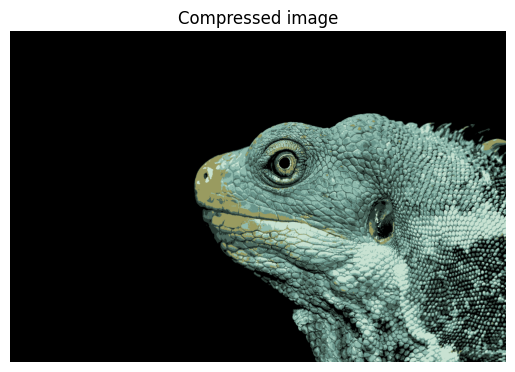

In [5]:
# Call main function
if __name__ == "__main__":
    main()